What You're Aiming For

Dataset Selection:
 Head over to Kaggle and choose a dataset that aligns with your interests. Ensure it involves either a classification or regression task.

 Real-world data can be messy, and that's perfectly fine! You're here to tame it.


Data Preprocessing:
 Identify and handle missing values within your dataset. Employ effective strategies for dealing with missing data.
 
 Implement data cleaning, formatting, and organization to prepare your dataset for training.


Feature Engineering:
 Enhance your model's performance by creating new features or transforming existing ones.
 
 Tailor your feature engineering techniques to address the specific needs of your chosen project.


Data Visualization:
 Utilize data visualization techniques to gain insights into your dataset.

 Create visualizations that reveal patterns and relationships, aiding your understanding of the data.


Model Selection:
 Choose the right model based on the nature of your problem.
 
 Consider factors such as the task type (classification or regression), dataset size, and alignment with algorithm assumptions.


Model Evaluation:
 Evaluate your model's performance using appropriate metrics for the chosen task (accuracy, classification reports, confusion matrices).
 
 Use appropriate methods: hyper parameter tuning, cross validation, etc.

 Justify your model selection and discuss the implications of your results.


Project Submission:
 Share your code and findings in the assignment section. Provide clear documentation and explanations.

 Highlight any challenges faced during the project and how you overcame them.

Instructions
 What dataset did you use?

 Explain your project! I want to see the thinking behind the code essentially.
e.g. why this project interested you, the steps you took while doing the project, how you decided what model to use.

In [14]:
import pandas as pd
import numpy as np

# ploting graphs 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly._subplots import make_subplots

# outliers
from scipy.stats import zscore

# normalisation and  transform non-num labels  to num for LabelEncoder.
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import QuantileTransformer, LabelEncoder, RobustScaler, StandardScaler

# spliting the data 
from sklearn.model_selection import train_test_split, GridSearchCV

# linear regression
from sklearn. linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Logistic regression 
from sklearn. linear_model import LogisticRegression
# mesure the performance of classification 
from sklearn import metrics
# Classification models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# evaluating the prediction 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Unsup
# Agglomerative 
from sklearn.cluster import AgglomerativeClustering
# Dendogram
import scipy.cluster.hierarchy as shc
# K_Means 
from sklearn .cluster import KMeans
# Yellowbrick 
from yellowbrick.cluster import KElbowVisualizer

# streamlit
import streamlit as st

# pandas profiling 
from ydata_profiling import ProfileReport 

# saving the model 
import joblib

In [15]:
df= pd.read_csv("heart_disease.csv")
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [17]:
df.shape 

(10000, 21)

In [18]:
df.dtypes

Age                     float64
Gender                   object
Blood Pressure          float64
Cholesterol Level       float64
Exercise Habits          object
Smoking                  object
Family Heart Disease     object
Diabetes                 object
BMI                     float64
High Blood Pressure      object
Low HDL Cholesterol      object
High LDL Cholesterol     object
Alcohol Consumption      object
Stress Level             object
Sleep Hours             float64
Sugar Consumption        object
Triglyceride Level      float64
Fasting Blood Sugar     float64
CRP Level               float64
Homocysteine Level      float64
Heart Disease Status     object
dtype: object

In [19]:
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [20]:
df.isnull().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

In [21]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [22]:
# Fill missing numerical values with the median
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

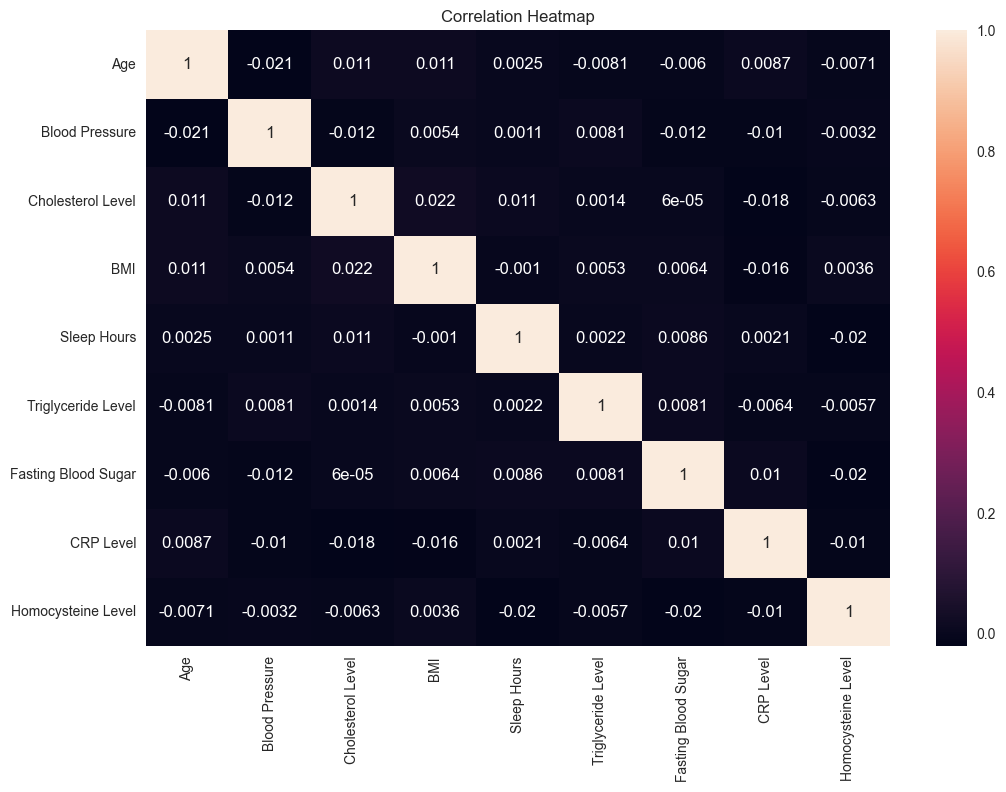

In [23]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [24]:
# Define features and target variable
X = df.drop('Heart Disease Status_Yes', axis=1)
y = df['Heart Disease Status_Yes']









In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
# Build and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [28]:
# Make predictions
y_pred = model.predict(X_test_scaled)


In [32]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:,1])
roc_auc = auc(fpr, tpr)
print(accuracy)
print(conf_matrix)
print(roc_auc)

0.8065
[[1613    0]
 [ 387    0]]
0.48416852094817464


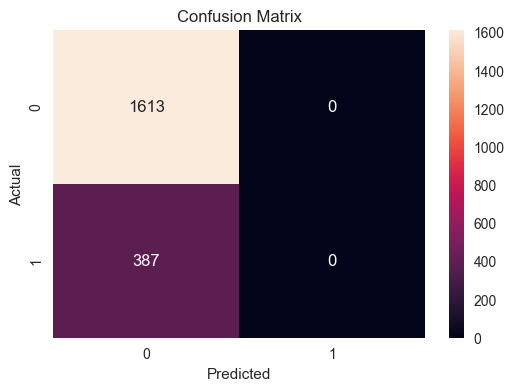

In [30]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()